In [115]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score


In [104]:
df_rain=pd.read_csv('rainfall in india 1901-2015.csv')
print(df_rain.head())

                 SUBDIVISION  YEAR   JAN    FEB   MAR    APR    MAY    JUN  \
0  ANDAMAN & NICOBAR ISLANDS  1901  49.2   87.1  29.2    2.3  528.8  517.5   
1  ANDAMAN & NICOBAR ISLANDS  1902   0.0  159.8  12.2    0.0  446.1  537.1   
2  ANDAMAN & NICOBAR ISLANDS  1903  12.7  144.0   0.0    1.0  235.1  479.9   
3  ANDAMAN & NICOBAR ISLANDS  1904   9.4   14.7   0.0  202.4  304.5  495.1   
4  ANDAMAN & NICOBAR ISLANDS  1905   1.3    0.0   3.3   26.9  279.5  628.7   

     JUL    AUG    SEP    OCT    NOV    DEC  ANNUAL  Jan-Feb  Mar-May  \
0  365.1  481.1  332.6  388.5  558.2   33.6  3373.2    136.3    560.3   
1  228.9  753.7  666.2  197.2  359.0  160.5  3520.7    159.8    458.3   
2  728.4  326.7  339.0  181.2  284.4  225.0  2957.4    156.7    236.1   
3  502.0  160.1  820.4  222.2  308.7   40.1  3079.6     24.1    506.9   
4  368.7  330.5  297.0  260.7   25.4  344.7  2566.7      1.3    309.7   

   Jun-Sep  Oct-Dec  
0   1696.3    980.3  
1   2185.9    716.7  
2   1874.0    690.6  
3   

In [105]:
print(df_rain.isnull().sum())

SUBDIVISION     0
YEAR            0
JAN             4
FEB             3
MAR             6
APR             4
MAY             3
JUN             5
JUL             7
AUG             4
SEP             6
OCT             7
NOV            11
DEC            10
ANNUAL         26
Jan-Feb         6
Mar-May         9
Jun-Sep        10
Oct-Dec        13
dtype: int64


In [106]:

df_rain['JAN'].fillna(df_rain['JAN'].mean(), inplace=True)
df_rain['FEB'].fillna(df_rain['FEB'].mean(), inplace=True)
df_rain['MAR'].fillna(df_rain['MAR'].mean(), inplace=True)
df_rain['APR'].fillna(df_rain['APR'].mean(), inplace=True)
df_rain['MAY'].fillna(df_rain['MAY'].mean(), inplace=True)
df_rain['JUN'].fillna(df_rain['JUN'].mean(), inplace=True)
df_rain['JUL'].fillna(df_rain['JUL'].mean(), inplace=True)
df_rain['AUG'].fillna(df_rain['AUG'].mean(), inplace=True)
df_rain['SEP'].fillna(df_rain['SEP'].mean(), inplace=True)
df_rain['OCT'].fillna(df_rain['OCT'].mean(), inplace=True)  
df_rain['NOV'].fillna(df_rain['NOV'].mean(), inplace=True)
df_rain['DEC'].fillna(df_rain['DEC'].mean(), inplace=True)
df_rain['ANNUAL'].fillna(df_rain['ANNUAL'].mean(), inplace=True)
df_rain['Jan-Feb'].fillna(df_rain['Jan-Feb'].mean(), inplace=True)
df_rain['Mar-May'].fillna(df_rain['Mar-May'].mean(), inplace=True)  
df_rain['Jun-Sep'].fillna(df_rain['Jun-Sep'].mean(), inplace=True)
df_rain['Oct-Dec'].fillna(df_rain['Oct-Dec'].mean(), inplace=True)
print(df_rain.isnull().sum())

SUBDIVISION    0
YEAR           0
JAN            0
FEB            0
MAR            0
APR            0
MAY            0
JUN            0
JUL            0
AUG            0
SEP            0
OCT            0
NOV            0
DEC            0
ANNUAL         0
Jan-Feb        0
Mar-May        0
Jun-Sep        0
Oct-Dec        0
dtype: int64


C:\Users\user\AppData\Local\Temp\ipykernel_23388\373391465.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_rain['JAN'].fillna(df_rain['JAN'].mean(), inplace=True)
C:\Users\user\AppData\Local\Temp\ipykernel_23388\373391465.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

F

In [107]:
x=df_rain[['YEAR','JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC']]
y=df_rain['ANNUAL']

In [111]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
model=LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [114]:
y_pred=model.predict(x_test)
print("R^2 Score:", r2_score(y_test, y_pred))
print("Root Mean Squared Error:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("Mean Absolute Error:", np.mean(np.abs(y_test - y_pred)))

R^2 Score: 0.9973960759542928
Root Mean Squared Error: 47.73356279149893
Mean Absolute Error: 16.227153347228096


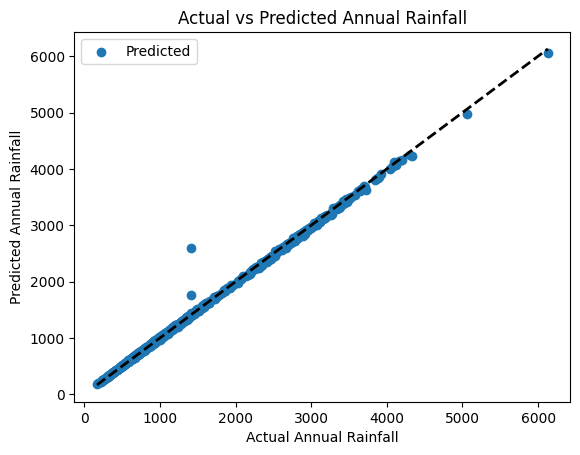

In [123]:
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Annual Rainfall')
plt.ylabel('Predicted Annual Rainfall')
plt.title('Actual vs Predicted Annual Rainfall')
plt.legend(['Predicted'])
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.show()


In [125]:
import joblib
joblib.dump(model, 'Rainfall_model.pkl')

['Rainfall_model.pkl']